<a href="https://colab.research.google.com/github/jej24/INTERPOL/blob/master/INTERPOLACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/INTERPOLACION/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/PDI/INTERPOLACION


In [0]:
#Display four images

def display3(a,b,c,title1="Orginial", title2="Edited",title3="Orginial"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a, cmap='gray'),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow(c, cmap='gray'), plt.title(title3)
    plt.xticks([]),plt.yticks([])
    plt.show()
    

def display22(a,b,title1="Orginial", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a, cmap='gray'),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()
    


def display3(a,b,c, title1="Orginial", title2="Edited", title3 = "Orginial"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]),plt.yticks([])
    plt.show()
    
def display2(a,b, title1="Orginial", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()
    

def readRGB(imagePath):
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

**INTERPOLACION NEAREST NEIGHBOUR**

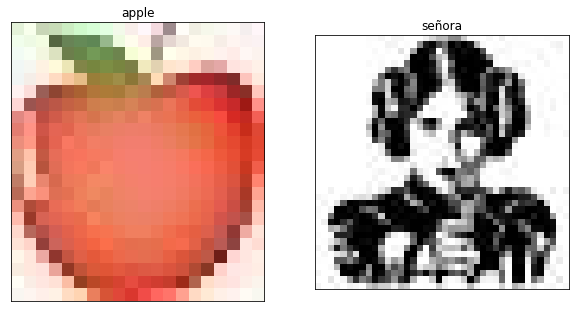

In [34]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_NEAREST)
display2(near_imgA, near_imgM, 'apple', 'señora')

**INTERPOLACION BILINEAR**

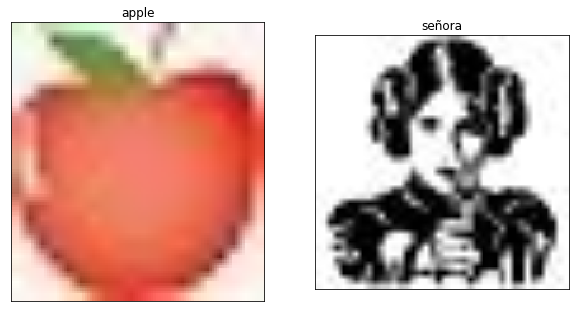

In [17]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_LINEAR)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_LINEAR)
display2(near_imgA, near_imgM, 'apple', 'señora')

**INTERPOLACION BICUBICA**

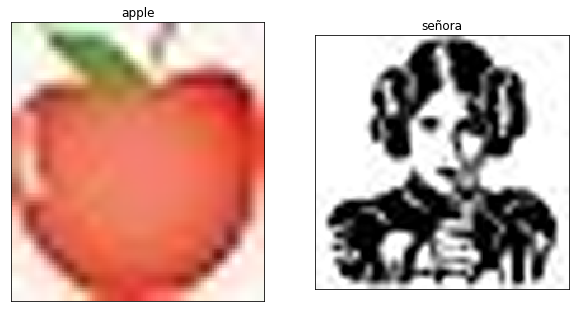

In [35]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_CUBIC)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_CUBIC)
display2(near_imgA, near_imgM, 'apple', 'señora')

**DOMINIO ESPACIAL**


P(X,Y) tranforma aparir de una operación.


**FILtros espaciales (MASCARAS) **

para modificar los pixeles creo mascaras (con tamaños impares, para poder tener un centro).(3x3, 5x5)


EL RESULTADO VA A ESTAR PARA EL CENTRO





*MATRIZ IDENTIDAD AL SER MULTIPLICADA RESULTA LA MATRIZ ORIGINAL*

TRANSFORMACION NEGATIVA (INVIERTE LOS COLORES)

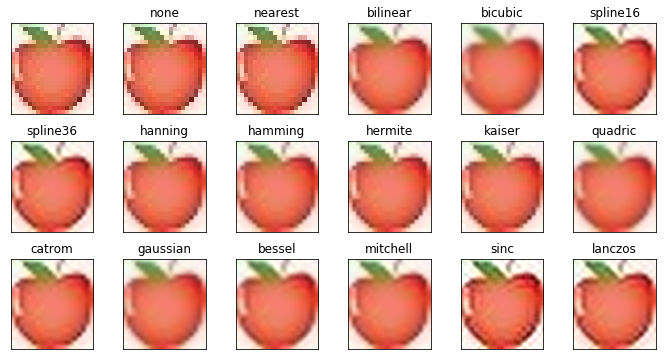

In [36]:
methods = [None, 'none','nearest','bilinear','bicubic','spline16','spline36','hanning','hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell','sinc','lanczos']
grid=imgA
fig, axes=plt.subplots(3,6, figsize=(12,6),subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
  ax.imshow(grid, interpolation=interp_method)
  ax.set_title(interp_method)
  
plt.show()


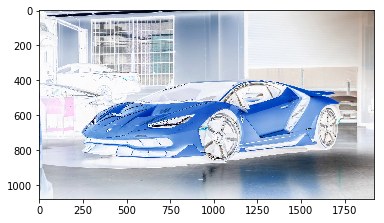

In [39]:
from PIL import Image

foto = Image.open('INTER.jpg')

datos = list(foto.getdata())

datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
                   
imagen_invertida = Image.new('RGB', foto.size)
                   
imagen_invertida.putdata(datos_invertidos)
                   
plt.imshow(np.asarray(imagen_invertida))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

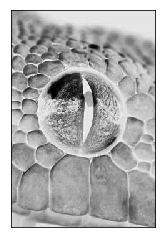

In [47]:
from PIL import Image

foto = Image.open('ojo.jpg')

datos = list(foto.getdata())

datos_invertidos = [255 - x for x in datos]
                   
imagen_invertida = Image.new('L', foto.size)
                   
imagen_invertida.putdata(datos_invertidos)
                   
plt.imshow(np.asarray(imagen_invertida), cmap = 'gray')
plt.xticks([]),plt.yticks([])

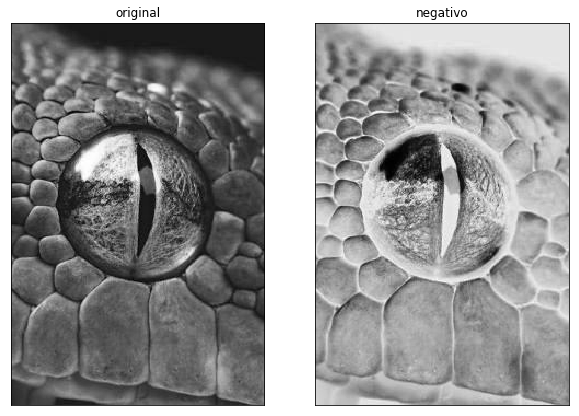

In [57]:
def negative(l):
  
    img = cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (l-1) - img[x,y]
            
    display22(img, img2, 'original', 'negativo')
    return
  
negative(256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


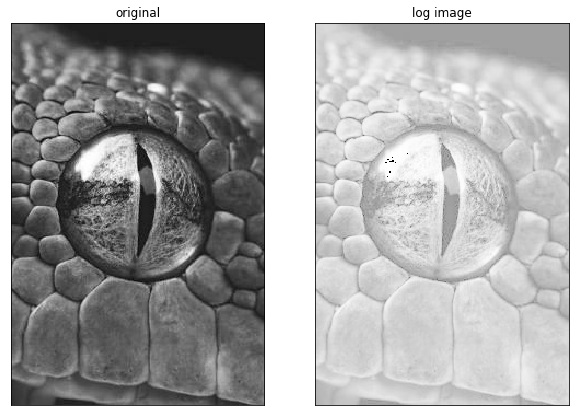

In [59]:
import cv2
import numpy as np

img = cv2.imread('ojo.jpg')

#apply log tranform

img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255

#specify the dat type

img_log = np.array(img_log, dtype= np.uint8)

#display the image

display22(img, img_log, 'original', 'log image')